**** CUDA not available - continuing with CPU ****
net name: 0-SGD; loss: 0.689: 100%|██████████| 50/50 [00:02<00:00, 17.58it/s]
net name: 0-SGD; loss: 0.689; validation loss: 0.688: 100%|██████████| 35/35 [00:00<00:00, 56.33it/s]
net name: 0-Adam; loss: 0.659: 100%|██████████| 50/50 [00:04<00:00, 10.76it/s]
net name: 0-Adam; loss: 0.659; validation loss: 0.568: 100%|██████████| 35/35 [00:00<00:00, 48.01it/s]
net name: 0-Adam1; loss: 0.693: 100%|██████████| 50/50 [00:04<00:00, 11.29it/s]
net name: 0-Adam1; loss: 0.693; validation loss: 0.688: 100%|██████████| 35/35 [00:00<00:00, 53.09it/s]
net name: 1-SGD; loss: 0.693: 100%|██████████| 50/50 [00:00<00:00, 63.06it/s]
net name: 1-SGD; loss: 0.693; validation loss: 0.684: 100%|██████████| 35/35 [00:00<00:00, 123.14it/s]
net name: 1-Adam; loss: 0.608: 100%|██████████| 50/50 [00:00<00:00, 58.29it/s]
net name: 1-Adam; loss: 0.608; validation loss: 0.518: 100%|██████████| 35/35 [00:00<00:00, 86.87it/s]
net name: 1-Adam1; loss: 0.626: 100%|███

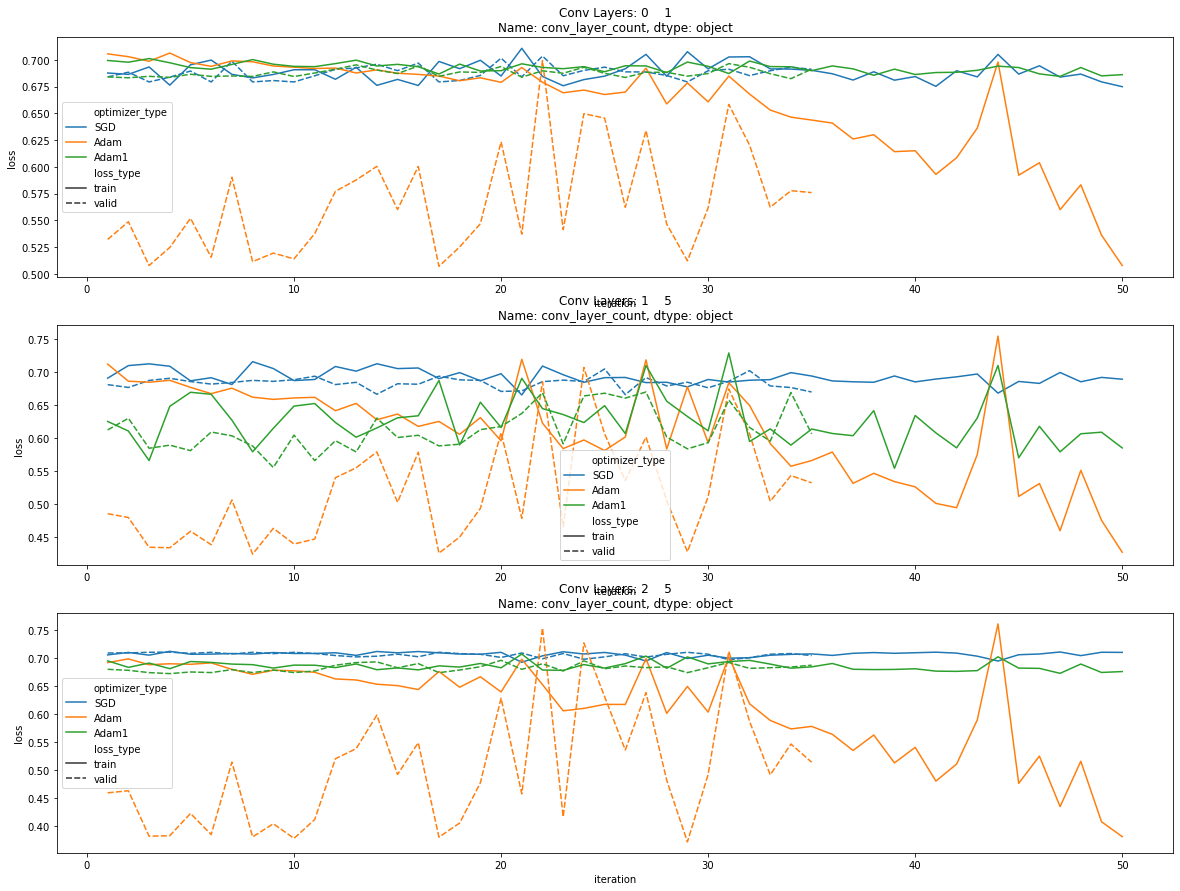

In [1]:
"""
build CNNs from COVID-19 patient data
"""
from __future__ import division, print_function

from network_dictionary_builder import NetDictionary
from network_dictionary_analyzer import NetDictionaryAnalyzer
from utilities import *
#use CUDA if available

#global constants
NET_PATH = './networks.tar'
DATA_PATH = './datasets.tar'
IMAGE_DEPTH = 4
LABELS = ('Hospitalized', 'Intubated', 'Deceased', 'Pneumonia')
COLUMNS = ('Male', 'Pregnant', 'Diabetes', 'Asthma', 'Immunocompromised',
           'Hypertension', 'Other Disease', 'Cardiovascular Disease', 'Obesity', 'Kidney Disease',
           'Tobacco Use', 'COPD')
itc = ImageTensorCreator(IMAGE_DEPTH, COLUMNS)
LOSS_RECORDING_RATE = 1

#main functions
test_tensor = itc.create_fake_data(40,["Diabetes"])
network_dictionary = NetDictionary(3, test_tensor, len(LABELS), NET_PATH, force_rebuild=False, force_training=True)

ccd = CovidCnnDataset(DATA_PATH, itc, pyodbc_conn_string='DSN=covid;UID=seh;PWD=Welcome2020!;',
                                      query="{CALL getpydatav2}",
                                      #force_rebuild=True,
                                      approx_dataset_size=54000,
                                      validation_ratio=0.4)

network_dictionary.train_validate_networks(ccd.train_data, ccd.validation_images,
                                           ccd.validation_labels, LOSS_RECORDING_RATE)

print('Finished Training')
network_dictionary.export_networks()

network_analysis = NetDictionaryAnalyzer(network_dictionary)
network_analysis.plot_losses()